<a href="https://colab.research.google.com/github/tatwan/demystifying_langchain_llamaindex/blob/main/Demystifying_HuggingFace%2C_LangChain%2C_and_LlamaIndex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hugging Face

In [ ]:
# Installing Hugging Face libraries

%pip install transformers
%pip install huggingface_hub
%pip install accelerate

## Hugging Face Pipeline
> The pipeline abstraction is a wrapper around all the other available pipelines.

In [ ]:
import torch
from transformers import pipeline

### Example: Summarization

In [ ]:
summarizer = pipeline("summarization")

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [ ]:
wikipedia_text = """The Fédération internationale de football association (French for 'International Association Football Federation';
[3] abbreviated as FIFA and pronounced in English as /ˈfiːfə/) is the international governing body of association football, beach soccer,
and futsal. It was founded in 1904[4] to oversee international competition among the national associations of Belgium, Denmark, France,
Germany, the Netherlands, Spain, Sweden and Switzerland. Headquartered in Zürich, Switzerland, its membership now comprises 211 national
associations. These national associations must also be members of one of the six regional confederations into which the world is divided:
CAF (Africa), AFC (Asia and Australia), UEFA (Europe), CONCACAF (North & Central America and the Caribbean), OFC (Oceania) and CONMEBOL
(South America). It is most notable for the FIFA World Cup, held every four years.
FIFA outlines several objectives in its organizational statutes, including growing association football internationally, providing efforts
to ensure it is accessible to everyone, and advocating for integrity and fair play.[5] It is responsible for the organization and promotion
of association football's major international tournaments, notably the World Cup which commenced in 1930, and the Women's World Cup which
began in 1991. Although FIFA does not solely set the laws of the game, that being the responsibility of the International Football Association
Board of which FIFA is a member, it applies and enforces the rules across all FIFA competitions.[6] All FIFA tournaments generate revenue from
sponsorships; in 2022, FIFA had revenues of over US $5.8 billion, ending the 2019–2022 cycle with a net positive of US$1.2 billion, and cash
reserves of over US$3.9 billion.[7]
Reports by investigative journalists have linked FIFA leadership with corruption, bribery, and vote-rigging related to the election of FIFA
president Sepp Blatter and the organization's decision to award the 2018 and 2022 World Cups to Russia and Qatar, respectively. These
allegations led to the indictments of nine high-ranking FIFA officials and five corporate executives by the U.S. Department of Justice
on charges including racketeering, wire fraud, and money laundering. On 27 May 2015, several of these officials were arrested by Swiss
authorities, who launched a simultaneous but separate criminal investigation into how the organization awarded the 2018 and 2022 World Cups.
Those among these officials who were also indicted in the U.S. are expected to be extradited to face charges there as well.[8][9][10]
Many officials were suspended by FIFA's ethics committee including Sepp Blatter[11] and Michel Platini.[12] In early 2017, reports became
public about FIFA president Gianni Infantino attempting to prevent the re-elections[13] of both chairmen of the ethics committee,
Cornel Borbély and Hans-Joachim Eckert, during the FIFA congress in May 2017.[14][15] On 9 May 2017, following Infantino's proposal,[16]
FIFA Council decided not to renew the mandates of Borbély and Eckert.[16] Together with the chairmen, 11 of 13 committee members were
removed. FIFA has been suspected of corruption regarding the Qatar 2022 FIFA World Cup.[17]
"""

result = summarizer(wikipedia_text, max_length=150, min_length=30)

In [ ]:
result[0]['summary_text']

' FIFA is the international governing body of association football, beach soccer, and futsal . It was founded in 1904 to oversee international competition among the national associations of Belgium, Denmark, France, Germany, the Netherlands, Spain, Sweden and Switzerland . It is most notable for the FIFA World Cup, held every four years . FIFA does not set the laws of the game but enforces the rules across all FIFA competitions .'

### Example Sentiment Analysis

In [ ]:
sentiment = pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [ ]:
text = ['I am a big fan of FIFA', 'I did not enjoy the last soccer game', 'I would watch a soccer game over a tennis match']
sentiment_result = sentiment(text)

In [ ]:
for r,t in zip(sentiment_result, text):
  print(t, '-->', r['label'])

I am a big fan of FIFA --> POSITIVE
I did not enjoy the last soccer game --> NEGATIVE
I would watch a soccer game over a tennis match --> NEGATIVE


### Example Translation

In [ ]:
translator = pipeline("translation", model="Helsinki-NLP/opus-mt-en-fr")

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:197: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


In [ ]:
# translate the previous summary
translator(result[0]['summary_text'])


[{'translation_text': 'Il a été fondé en 1904 pour superviser la compétition internationale entre les associations nationales de Belgique, Danemark, France, Allemagne, Pays-Bas, Espagne, Suède et Suisse. Il est le plus remarquable pour la Coupe du monde FIFA, tenue tous les quatre ans. FIFA ne fixe pas les lois du jeu mais fait appliquer les règles dans toutes les compétitions FIFA.'}]

In [ ]:
pipe = pipeline("text-generation", model="databricks/dolly-v2-3b", trust_remote_code=True)

instruct_pipeline.py:   0%|          | 0.00/9.16k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/databricks/dolly-v2-3b:
- instruct_pipeline.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


pytorch_model.bin:   0%|          | 0.00/5.68G [00:00<?, ?B/s]

# LangChain

## Example readnig a PDF

In [1]:
%pip install langchain langchain-experimental langchain-openai openai pypdf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 817.0/817.0 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.6/171.6 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.7/226.7 kB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.0/284.0 kB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 27.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.8/250.8 kB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 56.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
from langchain.document_loaders import PyPDFLoader

In [3]:
pdf_path = 'https://arxiv.org/pdf/2012.12931.pdf'

In [4]:
pdf_loader = PyPDFLoader(file_path = pdf_path)

In [6]:
pdf_data = pdf_loader.load_and_split()

In [7]:
len(pdf_data)

24

In [8]:
print(pdf_data[0].page_content)

3850 IEEETRANSACTIONS ON POWER SYSTEMS, VOL. 31, NO. 5,SEPTEMBER 2016
Very Short-Term Nonparametric Probabilistic
Forecasting of Renewable Energy Generation—
With Application to Solar Energy
Faranak Golestaneh , Student Member, IEEE , Pierre Pinson , Senior Member, IEEE ,a n d
H. B. Gooi , Senior Member, IEEE
Abstract— Due to the inherent uncertainty involved in renew-
ableenergyforecasting,u ncertaintyquantiﬁcati onisakeyinputto
maintain acceptable levels of relia bility and proﬁtability in power
systemoperation.Aproposalisformulatedandevaluatedhereforthe case of solar power generation, when only powe ra n dm e t e -
orological measurements are available, without sky-imaging andinformationaboutcloudpassages. Ourempiricalinvestigation re-
vealsthatthedistributionofforecaster rorsdonotfollowanyofthe
common parametric densities. This therefore motivates the pro-posal of a nonparametric appr oach to generate very short-term
predictive densities, i.e., for lead ti mes between a few minutes

In [9]:
len(pdf_data[0].page_content)

3915

**CharacterTextSplitter**:
* Tries to preserve paragraphs, sentences, and words as coherent units.
* Can specify chunk_size, chunk_overlap, and separator.
* Does not automatically handle very large chunks; instead, it relies on the user setting appropriate values for chunk_size and chunk_overlap.

**RecursiveCharacterTextSplitter**:
* Similar to CharacterTextSplitter, but adds recursive splitting capabilities.
* Automatically handles very large chunks by attempting to split them according to the specified chunk_size and separator list.
* If a chunk remains too large after the first round of splitting, it will try again with subsequent separators in the list.

In [11]:
from langchain.text_splitter import CharacterTextSplitter, RecursiveCharacterTextSplitter

# split on "\n\n"
splitterC = CharacterTextSplitter(
    chunk_size = 1000,
    chunk_overlap = 0
)

# split ["\n\n", "\n", " ", "" ]
splitterR = RecursiveCharacterTextSplitter(
     chunk_size = 1000,
     chunk_overlap = 0
)

pdf_data_CS = pdf_loader.load_and_split(text_splitter=splitterC)
pdf_data_RS = pdf_loader.load_and_split(text_splitter=splitterR)

In [12]:
len(pdf_data_CS)

14

In [13]:
len(pdf_data_RS)

75

In [15]:
len((pdf_data_RS[1].page_content))

996

In [16]:
print(pdf_data_RS[0].page_content)

3850 IEEETRANSACTIONS ON POWER SYSTEMS, VOL. 31, NO. 5,SEPTEMBER 2016
Very Short-Term Nonparametric Probabilistic
Forecasting of Renewable Energy Generation—
With Application to Solar Energy
Faranak Golestaneh , Student Member, IEEE , Pierre Pinson , Senior Member, IEEE ,a n d
H. B. Gooi , Senior Member, IEEE
Abstract— Due to the inherent uncertainty involved in renew-
ableenergyforecasting,u ncertaintyquantiﬁcati onisakeyinputto
maintain acceptable levels of relia bility and proﬁtability in power
systemoperation.Aproposalisformulatedandevaluatedhereforthe case of solar power generation, when only powe ra n dm e t e -
orological measurements are available, without sky-imaging andinformationaboutcloudpassages. Ourempiricalinvestigation re-
vealsthatthedistributionofforecaster rorsdonotfollowanyofthe
common parametric densities. This therefore motivates the pro-posal of a nonparametric appr oach to generate very short-term


In [ ]:
from langchain.chains.summarize import load_summarize_chain
from langchain.chat_models import ChatOpenAI

In [ ]:
# Load OPENAI and API_KEY
import configparser
import os
config = configparser.ConfigParser()

file = '/content/env.cfg'
config.read_file(open(file))

os.environ['OPENAI_API_KEY'] = config['OPENAI']['api_key']

In [ ]:
llm = ChatOpenAI(temperature=0, model_name="gpt-3.5-turbo-1106")

chain = load_summarize_chain(
    llm=llm,
    chain_type='stuff'
)

chain.run(pdf_data[3:5])

'The study addresses the issue of using classification datasets to evaluate graph outlier detection and highlights the "performance flip" phenomenon, where models achieve high detection performance on one variant of the dataset but fail on the other. The study identifies driving factors behind this issue, such as density disparity and overlapping support, and proposes concrete measures to quantify these factors. The study also provides insights for graph-level outlier detection and calls attention to important questions regarding fair evaluation and model selection. All methods and datasets used in the study are open-sourced for further investigation.'

## Example LangChain with pandas DataFrame
* Data Source: SQLite Database
* https://github.com/lerocha/chinook-database/blob/master/ChinookDatabase/DataSources/Chinook_Sqlite.sqlite

In [ ]:
import pandas as pd
import sqlite3

In [ ]:
# Create connection to the Sqlite database
con = sqlite3.connect("/content/Chinook_Sqlite.sqlite")

In [ ]:
query = '''
select
	c.*,
	i.InvoiceDate ,
	i.Total as Sales ,
	il.UnitPrice ,
	il.Quantity ,
	t.Name as TrackName,
	a.Title as AlbumTitle,
	a2.Name as ArtistName,
	g.Name as Genre,
	mt.Name as MediaType
from
	Customer c
join Invoice i on
	c.CustomerId = i.CustomerId
join InvoiceLine il on
	i.InvoiceId = il.InvoiceId
join Track t on
	il.TrackId = t.TrackId
join Album a on
	t.AlbumId = a.AlbumId
join Artist a2 on
	a.ArtistId = a2.ArtistId
join Genre g on
	t.GenreId = g.GenreId
join MediaType mt on
	t.MediaTypeId = mt.MediaTypeId
'''

In [ ]:
# Read sqlite query results into a pandas DataFrame
df = pd.read_sql_query(query, con)
df.head()

,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,...,SupportRepId,InvoiceDate,Sales,UnitPrice,Quantity,TrackName,AlbumTitle,ArtistName,Genre,MediaType
0,2,Leonie,Köhler,None,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,+49 0711 2842222,...,5,2009-01-01 00:00:00,1.98,0.99,1,Balls to the Wall,Balls to the Wall,Accept,Rock,Protected AAC audio file
1,2,Leonie,Köhler,None,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,+49 0711 2842222,...,5,2009-01-01 00:00:00,1.98,0.99,1,Restless and Wild,Restless and Wild,Accept,Rock,Protected AAC audio file
2,4,Bjørn,Hansen,None,Ullevålsveien 14,Oslo,None,Norway,0171,+47 22 44 22 22,...,4,2009-01-02 00:00:00,3.96,0.99,1,Put The Finger On You,For Those About To Rock We Salute You,AC/DC,Rock,MPEG audio file
3,4,Bjørn,Hansen,None,Ullevålsveien 14,Oslo,None,Norway,0171,+47 22 44 22 22,...,4,2009-01-02 00:00:00,3.96,0.99,1,Inject The Venom,For Those About To Rock We Salute You,AC/DC,Rock,MPEG audio file
4,4,Bjørn,Hansen,None,Ullevålsveien 14,Oslo,None,Norway,0171,+47 22 44 22 22,...,4,2009-01-02 00:00:00,3.96,0.99,1,Evil Walks,For Those About To Rock We Salute You,AC/DC,Rock,MPEG audio file


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CustomerId    2240 non-null   int64  
 1   FirstName     2240 non-null   object 
 2   LastName      2240 non-null   object 
 3   Company       380 non-null    object 
 4   Address       2240 non-null   object 
 5   City          2240 non-null   object 
 6   State         1140 non-null   object 
 7   Country       2240 non-null   object 
 8   PostalCode    2088 non-null   object 
 9   Phone         2202 non-null   object 
 10  Fax           456 non-null    object 
 11  Email         2240 non-null   object 
 12  SupportRepId  2240 non-null   int64  
 13  InvoiceDate   2240 non-null   object 
 14  Sales         2240 non-null   float64
 15  UnitPrice     2240 non-null   float64
 16  Quantity      2240 non-null   int64  
 17  TrackName     2240 non-null   object 
 18  AlbumTitle    2240 non-null 

In [ ]:
from langchain.agents.agent_types import AgentType
from langchain_experimental.agents.agent_toolkits import create_pandas_dataframe_agent

In [ ]:
agent = create_pandas_dataframe_agent(
    ChatOpenAI(temperature=0, model="gpt-3.5-turbo-0613"),
    df,
    verbose=True,
    agent_type=AgentType.OPENAI_FUNCTIONS,
)

In [ ]:
df.shape

(2240, 22)

In [ ]:
agent.run("how many rows and columns are in the dataset?")



> Entering new AgentExecutor chain...

Invoking: `python_repl_ast` with `{'query': 'df.shape'}`


(2240, 22)The dataset has 2240 rows and 22 columns.

> Finished chain.


'The dataset has 2240 rows and 22 columns.'

In [ ]:
agent.run("how many unique countries in the dataset?")



> Entering new AgentExecutor chain...

Invoking: `python_repl_ast` with `{'query': "df['Country'].nunique()"}`


24There are 24 unique countries in the dataset.

> Finished chain.


'There are 24 unique countries in the dataset.'

In [ ]:
agent.run("what are the top 5 most common track names and their artists?")



> Entering new AgentExecutor chain...

Invoking: `python_repl_ast` with `{'query': "df.groupby(['TrackName', 'ArtistName']).size().reset_index(name='count').nlargest(5, 'count')"}`


                    TrackName   ArtistName  count
1671              The Trooper  Iron Maiden      5
491                  Eruption    Van Halen      4
660      Hallowed Be Thy Name  Iron Maiden      4
1535      Sure Know Something         Kiss      4
1648  The Number Of The Beast  Iron Maiden      4The top 5 most common track names and their artists are:

1. Track Name: "The Trooper", Artist: "Iron Maiden", Count: 5
2. Track Name: "Eruption", Artist: "Van Halen", Count: 4
3. Track Name: "Hallowed Be Thy Name", Artist: "Iron Maiden", Count: 4
4. Track Name: "Sure Know Something", Artist: "Kiss", Count: 4
5. Track Name: "The Number Of The Beast", Artist: "Iron Maiden", Count: 4

> Finished chain.


'The top 5 most common track names and their artists are:\n\n1. Track Name: "The Trooper", Artist: "Iron Maiden", Count: 5\n2. Track Name: "Eruption", Artist: "Van Halen", Count: 4\n3. Track Name: "Hallowed Be Thy Name", Artist: "Iron Maiden", Count: 4\n4. Track Name: "Sure Know Something", Artist: "Kiss", Count: 4\n5. Track Name: "The Number Of The Beast", Artist: "Iron Maiden", Count: 4'

In [ ]:
agent.run("what are the top 5 most popular artists?")



> Entering new AgentExecutor chain...

Invoking: `python_repl_ast` with `{'query': "df['ArtistName'].value_counts().head(5)"}`


Iron Maiden                140
U2                         107
Metallica                   91
Led Zeppelin                87
Os Paralamas Do Sucesso     45
Name: ArtistName, dtype: int64The top 5 most popular artists are:

1. Iron Maiden - 140
2. U2 - 107
3. Metallica - 91
4. Led Zeppelin - 87
5. Os Paralamas Do Sucesso - 45

> Finished chain.


'The top 5 most popular artists are:\n\n1. Iron Maiden - 140\n2. U2 - 107\n3. Metallica - 91\n4. Led Zeppelin - 87\n5. Os Paralamas Do Sucesso - 45'

# LLamaIndex

In [ ]:
%pip install llama-index

## Example LLamaIndex and pandas DataFrame

In [ ]:
%whos

Variable                         Type                              Data/Info
----------------------------------------------------------------------------
AgentType                        EnumMeta                          <enum 'AgentType'>
CharacterTextSplitter            ABCMeta                           <class 'langchain.text_sp<...>r.CharacterTextSplitter'>
ChatOpenAI                       ModelMetaclass                    <class 'langchain_communi<...>odels.openai.ChatOpenAI'>
PyPDFLoader                      ABCMeta                           <class 'langchain_communi<...>loaders.pdf.PyPDFLoader'>
RecursiveCharacterTextSplitter   ABCMeta                           <class 'langchain.text_sp<...>veCharacterTextSplitter'>
agent                            AgentExecutor                     verbose=True agent=Runnab<...>240 rows x 22 columns]})]
chain                            StuffDocumentsChain               llm_chain=LLMChain(prompt<...>ment_variable_name='text'
con                   

In [ ]:
from llama_index.core.query_engine import PandasQueryEngine

In [ ]:
query_engine = PandasQueryEngine(df=df, verbose=True)

In [ ]:
query_engine.query("what are the top 5 most popular artists?");

> Pandas Instructions:
```
df['ArtistName'].value_counts().head(5)
```
> Pandas Output: Iron Maiden                140
U2                         107
Metallica                   91
Led Zeppelin                87
Os Paralamas Do Sucesso     45
Name: ArtistName, dtype: int64


In [ ]:
df['ArtistName'].value_counts().head(5)

Iron Maiden                140
U2                         107
Metallica                   91
Led Zeppelin                87
Os Paralamas Do Sucesso     45
Name: ArtistName, dtype: int64

In [ ]:
df['Email'].head()

0    leonekohler@surfeu.de
1    leonekohler@surfeu.de
2    bjorn.hansen@yahoo.no
3    bjorn.hansen@yahoo.no
4    bjorn.hansen@yahoo.no
Name: Email, dtype: object

In [ ]:
query_engine.query(
    "parse the emails and extract usernames",
);

> Pandas Instructions:
```
df['Username'] = df['Email'].str.split('@').str[0]
df['Username']
```
> Pandas Output: 0            leonekohler
1            leonekohler
2           bjorn.hansen
3           bjorn.hansen
4           bjorn.hansen
              ...       
2235    terhi.hamalainen
2236    terhi.hamalainen
2237    terhi.hamalainen
2238    terhi.hamalainen
2239        manoj.pareek
Name: Username, Length: 2240, dtype: object


In [ ]:
query_engine.query(
    "What is the correlation sales and unit price and quantity?",
);

> Pandas Instructions:
```
df[['Sales', 'UnitPrice', 'Quantity']].corr()
```
> Pandas Output:               Sales  UnitPrice  Quantity
Sales      1.000000   0.298778       NaN
UnitPrice  0.298778   1.000000       NaN
Quantity        NaN        NaN       NaN


> Pandas Instructions:
```
df.groupby('InvoiceYear')['Sales'].sum().plot(kind='line')
```
> Pandas Output: Axes(0.125,0.11;0.775x0.77)


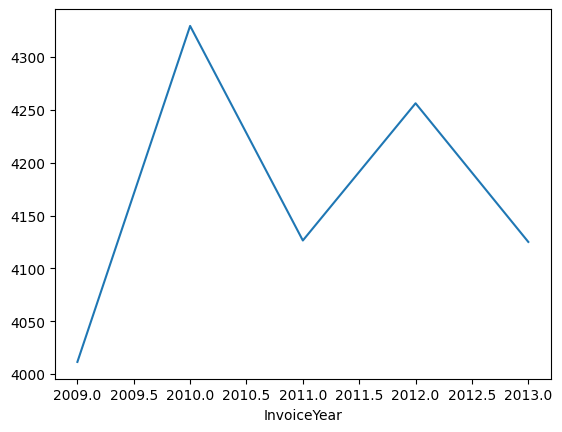

In [ ]:
query_engine.query(
    "show a line chart for total sales by invoice year",
);

<Axes: xlabel='InvoiceYear'>

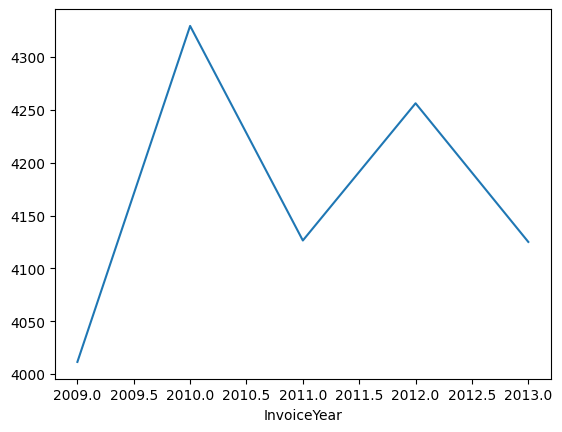

In [ ]:
df['InvoiceYear'] = pd.to_datetime(df['InvoiceDate']).dt.year
df.groupby('InvoiceYear')['Sales'].sum().plot(kind='line')

## Using Prompt Templates

In [ ]:
prompts = query_engine.get_prompts()
print(prompts["pandas_prompt"].template)

You are working with a pandas dataframe in Python.
The name of the dataframe is `df`.
This is the result of `print(df.head())`:
{df_str}

Follow these instructions:
{instruction_str}
Query: {query_str}

Expression:


In [ ]:
print(prompts["response_synthesis_prompt"].template)

Given an input question, synthesize a response from the query results.
Query: {query_str}

Pandas Instructions (optional):
{pandas_instructions}

Pandas Output: {pandas_output}

Response: 


In [ ]:
from llama_index.core import PromptTemplate

new_prompt = PromptTemplate(
    """\
You are working with a pandas dataframe in Python.
The name of the dataframe is `df`.
This is the result of `print(df.head())`:
{df_str}

Follow these instructions:
{instruction_str}
Query: {query_str}

Expression: """
)

instruction_str = """\
1. Convert the query to executable Python code using Pandas.
2. The final line of code should be a Python expression that can be called with the `eval()` function.
3. The code should represent a solution to the query.
4. PRINT ONLY THE EXPRESSION.
5. Do not quote the expression.
"""

query_engine.update_prompts({"pandas_prompt": new_prompt})

> Pandas Instructions:
```
df.groupby('InvoiceYear')['Sales'].sum().plot(kind='line')
```
> Pandas Output: Axes(0.125,0.11;0.775x0.77)


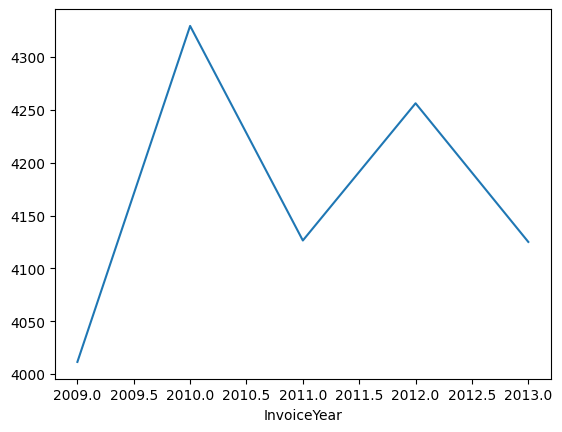

In [ ]:
query_engine.query(
    "show a line chart for total sales by invoice year",
);

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
import pandas as pd

query_engine.query(
    "Convert invoice date sales into a time series dataframe, and produce an ACF plot from statsmodels library",
);

> Pandas Instructions:
```
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
time_series_df = df.set_index('InvoiceDate')['Sales']
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(time_series_df)

```
> Pandas Output: There was an error running the output as Python code. Error message: name 'pd' is not defined


Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/llama_index/core/query_engine/pandas/output_parser.py", line 41, in default_output_processor
    safe_exec(ast.unparse(module), {}, local_vars)  # type: ignore
  File "/usr/local/lib/python3.10/dist-packages/llama_index/core/exec_utils.py", line 152, in safe_exec
    return exec(__source, _get_restricted_globals(__globals), __locals)
  File "<string>", line 1, in <module>
NameError: name 'pd' is not defined


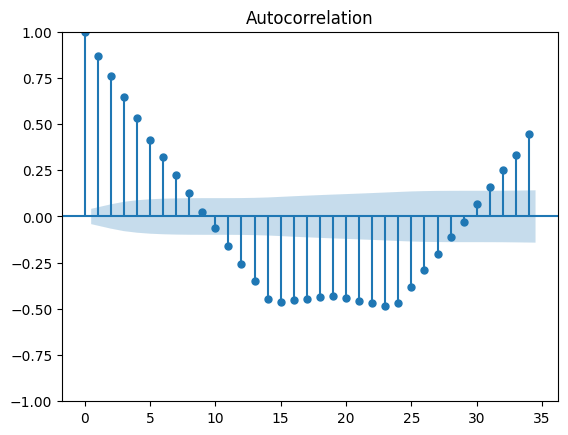

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
time_series_df = df.set_index('InvoiceDate')['Sales']
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(time_series_df);